# Avaliação 2 - Automação Industrial
## Tema: Cryptocurrency Historical Prices
### Membros: Artur Miranda, Eduardo Santos e Lucas Sarchis (Grupo 4)

### Link do vídeo no Youtube: https://www.youtube.com/watch?v=-1ORziQNhPI

Site onde foi retirado a base de dados: https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory

**OBS:** Como existem várias bases de dados, foi selecionado os dados de Bitcoins

In [695]:
""" Importando as bibliotecas """

# Coleta de dados na planilha
import pandas as pd
# Computação numérica
import numpy as np
# Dividir os dados em em fase de treino e teste
from sklearn.model_selection import train_test_split
# Importando os modelos de aprendizagem computacional
from sklearn import tree, linear_model
from sklearn.neural_network import MLPRegressor
# Cálculo dos erros
import math
import statistics as st
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# Plotagem dos resultados
import matplotlib.pyplot as plt

In [696]:
""" Estágio de leitura do arquivo no Drive """

# Importando o Drive para o Collab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [697]:
""" Estágio de coleta dos dados """

# Importando a planilha com os dados
Data = pd.read_csv('/content/drive/Shareddrives/Automação/coin_Bitcoin.csv')

# Mudando para matriz
Data = Data.to_numpy()

" Selecionando os dados da matriz em inputs e outputs "

# Maior valor, Menor valor, Valor de Abertura e Valor de Fechamento
X = Data[:,[4, 5, 6, 7]]
# Capitalização de mercado em USD
y = Data[:,9]

In [698]:
""" Estágio da divisão dos dados """

# Normalizando os inputs
Max_X = np.max(X)
Min_X = np.min(X)
Normalized_X = (X - Min_X)/(Max_X - Min_X)

# Normalizando os output
Max_y = np.max(y)
Min_y = np.min(y)
Normalized_y = (y - Min_y)/(Max_y - Min_y)

# Dividindo os dados em fase de treino e teste
Normalized_X_train, Normalized_X_test, Normalized_y_train, Normalized_y_test = train_test_split(Normalized_X, Normalized_y, test_size = 0.3)

# Renomeando os dados normalizados (para não deixar as linhas de código tão extensas)
X_train = Normalized_X_train
y_train = Normalized_y_train
X_test = Normalized_X_test
y_test = Normalized_y_test

In [699]:
""" Função para a Etapa de treinamento e teste """

def train_test(X_train, y_train, X_test, Model):

  # Treinando o modelo
  OutputTraining = Model.fit(X_train, y_train)
  # Testando o modelo
  OutputTest = Model.predict(X_test)

  return OutputTest

In [700]:
""" Função para a Etapa de cálculo das métricas de erro """

def error(y_test, OutputTest):
  RMSE = sqrt(mean_absolute_error(y_pred=OutputTest, y_true=y_test))
  MAE = mean_absolute_error(y_pred=OutputTest, y_true=y_test)
  SCORE = r2_score(y_test, OutputTest)

  # Calculando o Erro Quadrático Médio
  print("RMSE =", round(RMSE*100, 4), "%")
  # Calculando o Erro Médio Absoluto
  print("MAE  =", round(MAE*100, 4), "%")
  # Calculando a Acurácia do modelo
  print("SCORE =", round(SCORE*100, 4), "%")
  print("----------------------------")

  # Não é preciso retornar nada, pois os resultados já foram printados na função
  return 0

In [701]:
""" Theil-Sen (TS) """

# ts = linear_model.TheilSenRegressor()
# ts.fit(X_train, y_train)
# Y_test = ts.predict(X_test)

Model_TS = linear_model.TheilSenRegressor()
OutputTest_TS = train_test(X_train, y_train, X_test, Model_TS)

print('-------Theil-Sen (TS)-------')
Error_TS = error(y_test, OutputTest_TS)


""" Decision Tree (DT) """

Model_DT = tree.DecisionTreeRegressor()
OutputTest_DT = train_test(X_train, y_train, X_test, Model_DT)

print('-----Decision Tree (DT)-----')
Error_DT = error(y_test, OutputTest_DT)


""" Multi-layer Perceptron (MLP) """

Model_MLP = MLPRegressor()
OutputTest_MLP = train_test(X_train, y_train, X_test, Model_MLP)

print('Multi-layer Perceptron (MLP)')
Error_TS = error(y_test, OutputTest_MLP)

-------Theil-Sen (TS)-------
RMSE = 6.3947 %
MAE  = 0.4089 %
SCORE = 99.6371 %
----------------------------
-----Decision Tree (DT)-----
RMSE = 4.598 %
MAE  = 0.2114 %
SCORE = 99.9168 %
----------------------------
Multi-layer Perceptron (MLP)
RMSE = 5.4331 %
MAE  = 0.2952 %
SCORE = 99.8877 %
----------------------------


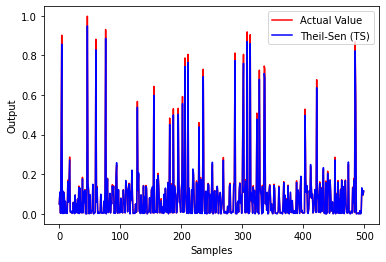

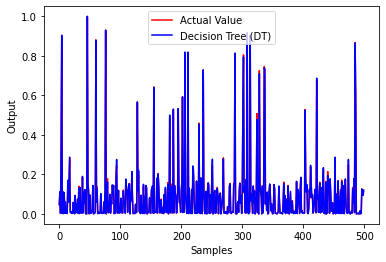

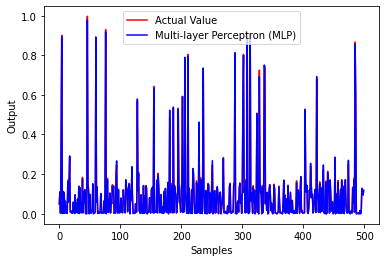

In [702]:
""" Estágio da plotagem dos gráficos """

" TS "

# Traçando o gráfico da série temporal real e a sua previsão
plt.plot(y_test[-500:,], label='Actual Value', color='red')
plt.plot(OutputTest_TS[-500:,], color='blue', label='Theil-Sen (TS)')
plt.ylabel('Output')
plt.xlabel('Samples')
plt.legend()
plt.show()

" DT "

# Traçando o gráfico da série temporal real e a sua previsão
plt.plot(y_test[-500:,], label='Actual Value', color='red')
plt.plot(OutputTest_DT[-500:,], color='blue', label='Decision Tree (DT)')
plt.ylabel('Output')
plt.xlabel('Samples')
plt.legend()
plt.show()

" MLP "

# Traçando o gráfico da série temporal real e a sua previsão
plt.plot(y_test[-500:,], label='Actual Value', color='red')
plt.plot(OutputTest_MLP[-500:,], color='blue', label='Multi-layer Perceptron (MLP)')
plt.ylabel('Output')
plt.xlabel('Samples')
plt.legend()
plt.show()

# Referências

### 1 - PHALADISAILOED, Thearasak; NUMNONDA, Thanisa. Machine learning models comparison for bitcoin price prediction. In: 2018 10th International Conference on Information Technology and Electrical Engineering (ICITEE). IEEE, 2018. p. 506-511.

###2 - ALVES, Kaike Sa Teles Rocha; DE AGUIAR, Eduardo Pestana. A novel rule-based evolving Fuzzy System applied to the thermal modeling of power transformers. Applied Soft Computing, v. 112, p. 107764, 2021.